## CONTENT BASED AND ITEM BASED RECOMMENDATION SYSTEM


### What is a Recommender System?

#### Recommender systems can be understood as systems that make suggestions. We often ask our friends about their views on recently watched movies. Based on that, we decide whether to watch the movie or drop the idea altogether. Imagine if we get the opinions of the maximum people who have watched the movie. We also get ideas about similar movies to watch, ratings, reviews, and the film as per our taste.

#### Recommender systems typically produce a list of recommendations in many different ways, om this part of the recommendation system we will go over basic Item-based filtering and Content-based filtering.

#### - Item-based filtering approaches build a model from direct values and facts from databases which have been accumulated by saving the reviews of thousand of viewers. This model is used to recommend movies to a user on already available values.
#### - Content-based filtering approaches utilize a series of discrete characteristics of an item in order to recommend additional items with similar properties.

___
### Load the basic libraries and load the first Dataset

#### Details of the dataset
#### - The first credit dataset contains 4803 rows and 4 columns.
#### - The second movies dataset contains 4803 rows and 20 columns

In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('C:/Users/Mayank Gokhale/Desktop/credits2.csv')
df1.head()

,movie_id,title,cast,crew
0,19995.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647.0,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026.0,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529.0,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Checking the basic information of the Dataset

In [2]:
df1.shape

(4833, 4)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833 entries, 0 to 4832
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  4804 non-null   float64
 1   title     4804 non-null   object 
 2   cast      4804 non-null   object 
 3   crew      4800 non-null   object 
dtypes: float64(1), object(3)
memory usage: 151.2+ KB


### Loading the second dataset and then checking its information

In [4]:
df2 = pd.read_csv('C:/Users/Mayank Gokhale/Desktop/movie.csv')
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df2.shape

(4803, 20)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

___
### Merging the Datasets 

In [7]:
df1.columns = ['id','title','cast','crew']
df2 = df2.merge(df1,on='id')

In [8]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [9]:
C = df2['vote_average'].mean()
C

6.092171559442011

In [10]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [11]:
lists_movies = df2.copy().loc[df2['vote_count']>=m]
lists_movies.shape

(481, 23)

In [12]:
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R)+(m/(m+v)*C)

In [13]:
lists_movies['score']=lists_movies.apply(weighted_rating, axis=1)

In [14]:
lists_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [15]:
lists_movies.shape

(481, 24)

In [16]:
lists_movies = lists_movies.sort_values('score',ascending = False)
lists_movies[['title_x','vote_count','vote_average','score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [17]:
lists_movies = lists_movies.sort_values('vote_count',ascending = False)
lists_movies[['title_x','vote_count','vote_average','score']].head(10)

,title_x,vote_count,vote_average,score
96,Inception,13752,8.1,7.863239
65,The Dark Knight,12002,8.2,7.920020
0,Avatar,11800,7.2,7.050669
16,The Avengers,11776,7.4,7.223399
788,Deadpool,10995,7.4,7.212652
95,Interstellar,10867,8.1,7.809479
287,Django Unchained,10099,7.8,7.536989
94,Guardians of the Galaxy,9742,7.9,7.613005
426,The Hunger Games,9455,6.9,6.768497
127,Mad Max: Fury Road,9427,7.2,7.019214


___
### Using new library to display the movie results in Graph form

Text(0.5, 1.0, 'Popular Movies')

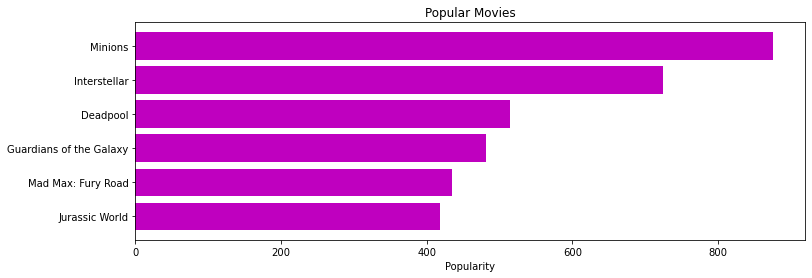

In [18]:
pop = df2.sort_values('popularity',ascending = False)
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.barh(pop['title_x'].head(6),pop['popularity'].head(6),align = 'center',color = 'm')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, 'High Budget Movies')

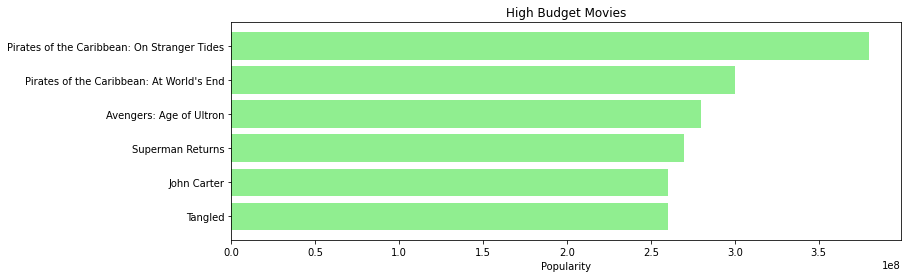

In [19]:
pop = df2.sort_values('budget',ascending = False)
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.barh(pop['title_x'].head(6),pop['budget'].head(6),align = 'center',color = 'lightgreen')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("High Budget Movies")

In [20]:
lists_movies.drop(['title_y'],axis =1,inplace=True)
lists_movies.shape

(481, 23)

___
## CONTENT BASED FILTERING

### What are Content-Based Recommender Systems ?
#### They make recommendations based on the descriptive attributes of items.To put it; Content = Description.

#### In content-based methods, the ratings and buying behavior of users are combined with the content information available in the items. E.g. Jane likes Terminator movie; based on the similar genre keywords other science fiction movies, such as Alien and Predator will be recommended.

In [21]:
import numpy as np
import pandas as pd

df2 = pd.read_csv('C:/Users/Mayank Gokhale/Desktop/movie.csv')
df2['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF_IDF Vectorizer Object. Remove all english stop words such as 'the','a'
tfidf = TfidfVectorizer(stop_words='english')

#replace NaN with and empty string
df2['overview'] = df2['overview'].fillna('')

#construct the required TF_IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [26]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim= linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [27]:
#function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1],reverse =True)
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df2['title'].iloc[movie_indices]

In [28]:
get_recommendations('American Pie')

2329                            Prom Night
2298                             Sex Drive
4750                           The Dirties
3915                              Trippin'
2392                              Superbad
2916    High School Musical 3: Senior Year
3263                                Easy A
4024                   The Spectacular Now
2828                             Project X
3266                                  Prom
Name: title, dtype: object

In [29]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

In [30]:
get_recommendations('JFK')

2507                Slow Burn
879       Law Abiding Citizen
2020               The Rookie
2193     Secret in Their Eyes
2697                    Bobby
753              The Sentinel
1202             Legal Eagles
817          American Wedding
65            The Dark Knight
3       The Dark Knight Rises
Name: title, dtype: object

In [31]:
print('Enter the movie name: ')
x = input()
get_recommendations(x)

Enter the movie name: 
The Dark Knight


3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: title, dtype: object